<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/regression_residuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Tutorial: From prediction to dependence and causality
By
Fayyaz Minhas


This Python notebook is designed to introduce the fundamentals of linear regression, a statistical method used for modeling the relationship between a dependent variable and one or more independent variables.

Linear regression is a fundamental statistical and machine learning technique used to model and analyze the relationships between a dependent variable and one or more independent variables. The goal of linear regression is to find a linear equation that best predicts the dependent variable based on the values of the independent variables. This technique is widely used across various fields such as economics, biology, engineering, and social sciences due to its simplicity and interpretability. It can be used for prediction or inference tasks.

### Prediction
Prediction focuses on estimating future outcomes based on known variables, prioritizing model accuracy over understanding the relationships between variables. It often employs complex models to achieve high predictive performance on unseen data.

### Inference
Inference aims to understand the relationships and effects between variables, emphasizing the significance and interpretation of these relationships. It uses simpler, interpretable models to draw conclusions about causal connections and mechanisms.

## Introduction to Linear Regression
At its core, linear regression attempts to draw a straight line (hence "linear") that comes closest to the data points. This line represents the predicted values of the dependent variable as a function of the independent variable(s). The simplest form of linear regression, called simple linear regression, involves only two variables: one independent variable and one dependent variable. However, the concept can be extended to multiple independent variables. Below we discuss the formulation of a linear regression model.

### Representation
For a given input vector (with a "1" added for the bias), linear regression uses the following representation:

$$f(\mathbf{x}) = w_0+w_1x_1 w_2x_2 + ... + w_dx_d = w^T x+w_0 $$
Here, $w$'s are the coefficients that measure the impact of each independent variable on the dependent variable.

### Evaluation
The goal of linear regression is to find the set of weights $w$ that best predicts the dependent variable $y$. To achieve this, we need a metric that quantifies how well our model's predictions match the actual data. This metric is known as the loss function, and in the case of linear regression, the most commonly used loss function is the Mean Squared Error (MSE) loss function.

$$ MSE = \frac{1}{N} \sum_{i=1}^N (y_i - f(\mathbf{x_i}))^2 $$

It measures the error between target and predicted values for $N$ training examples.

### Optimization

The process of optimization in linear regression involves finding the set of weights that minimize the loss function (in this case, the MSE). This is typically done using one of two methods given below. Once the parameters of the model (weights) are obtained, we can use them to generate predictions over test examples.

#### Analytical Solution (Normal Equation):

For linear regression, there's a closed-form solution known as the Normal Equation that directly computes the optimal weights that minimize the MSE. The solution is given by:
$$\mathbf w=(\mathbf X^T \mathbf X)^{-1}\mathbf X^T\mathbf{y}$$
$\mathbf X$ is the matrix of input features (with an additional column of ones for the intercept), $\mathbf y$ is the vector of the dependent variable. This method is straightforward and doesn't require iteration, but it can be computationally expensive for large datasets due to the matrix inversion operation.

#### Gradient Descent:
We can also solve it using gradient descent. See: https://github.com/foxtrotmike/CS909/blob/master/barebones.ipynb


## Historical Sidenote

The term "regression" was coined by Sir Francis Galton in the late 19th century while studying the relationship between the heights of fathers and their sons. Galton observed that taller fathers tended to have sons who were also tall but closer to the average height, and shorter fathers had sons who were shorter but again, closer to the average. This phenomenon, where extreme values seemed to "regress" towards the mean over generations, led him to use the term "regression towards mediocrity" for this observation.

In today's context, regression analysis has expanded far beyond Galton's initial observation, referring to a broad set of statistical methods for modeling and analyzing the relationships between one or more independent variables and a dependent variable. Despite the evolution of its applications, the term "regression" remains, now signifying the technique's foundational principle of estimating relationships among variables.

## Application in This Tutorial
In this tutorial, we start with an example of simple linear regression to illustrate the basic principles of fitting a linear model, analyzing its performance, and interpreting the results. Our example focuses on using a single independent variable to predict a dependent variable, providing a clear and straightforward illustration of how linear regression works.

However, it's important to note that the principles and techniques we discuss can be extended to multiple linear regression, where more than one independent variable is used to predict the outcome. This flexibility makes linear regression a powerful tool for modeling complex relationships and understanding how multiple factors influence a particular outcome.

By starting with the foundation of simple linear regression and acknowledging the pathway to multiple linear regression, this tutorial aims to equip you with the knowledge and skills to apply linear regression analysis to a wide range of real-world problems, whether they involve a single predictor or multiple predictors.


The provided code demonstrates how to implement linear regression, assess model assumptions, and interpret results.

# Installing Required Libraries

We use statsmodels over scikit-learn for its focus on statistical inference, providing detailed summaries, tests, and diagnostics crucial for understanding the relationships in linear regression. It excels in educational contexts and when the aim is to interpret model coefficients and assumptions. In contrast, scikit-learn is tailored for predictive modeling and machine learning tasks, prioritizing model performance and scalability.



In [1]:
!pip install statsmodels

 # Generating Synthetic Data

 We generate some simple synthetic data.

 Independent Variable (X): Simulates the explanatory variable with a normal distribution, mean of 1.5, and standard deviation of 2.5.

Noise (noise): Random noise added to the dependent variable, also normally distributed, to mimic real-world data variability.

Dependent Variable (y): The outcome variable calculated from the independent variable, a fixed intercept (2), a slope coefficient (0.3), and residual error.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import probplot
from scipy import stats
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


X = 2.5 * np.random.randn(1000) + 1.5   # Array of 1000 values with mean = 1.5, stddev = 2.5
noise = 0.5 * np.random.randn(1000)       # Generate 1000 noise terms
y = 2 + 0.3 * X + noise                   # Actual values of Y

# Splitting the Data
This step divides the dataset into training and testing sets (90% training, 10% testing), a common practice for evaluating model performance on unseen data.



Text(0, 0.5, 'y')

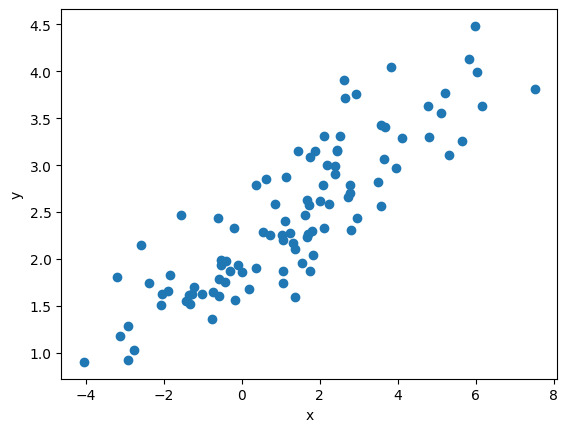

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
plt.figure();plt.scatter(X_test,y_test);plt.xlabel('x');plt.ylabel('y')


# Preparing Data for Modeling
Adds a constant to the independent variable to include an intercept in the regression model.



In [4]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)


# Fitting the Linear Regression Model
Uses Ordinary Least Squares (OLS) method to estimate the linear regression coefficients that minimize the sum of squared residuals.



In [5]:
model = sm.OLS(y_train, X_train_const).fit()


# Predicting and Assessing Model Performance
Predicts the dependent variable values using the fitted model and the test data.



In [6]:
y_pred = model.predict(X_test_const)


# Visualizing Predicted data
Let's Assess model accuracy by comparing actual and predicted outcomes by plotting them.
To enhance the understanding of linear regression and evaluate the model's performance comprehensively, we can compute several key regression metrics: Root Mean Square Error (RMSE), R-squared (R2), Pearson correlation coefficient, and Spearman's rank correlation coefficient, etc. See the intuitive explanation of each below. Try gaining an understanding of these metrics (along with what are p-values!).



RMSE: 0.40853030949921487
R-squared: 0.7341596580125012
MAE: 0.3179909314363273
Median Absolute Error: 0.24919431844748474
Pearson Correlation Coefficient: 0.8626144991870631 p-value: 9.184411804990585e-31
Spearman Correlation Coefficient: 0.8700750075007501 p-value: 7.183133614237866e-32
MSE: 0.1668970137795243
MAPE: 13.282900003869228%
RMSLE: 0.11988481787009542
Adjusted R-squared: 0.7314470014616083
AIC: 1220.59651521963
BIC: 1230.2013047462785


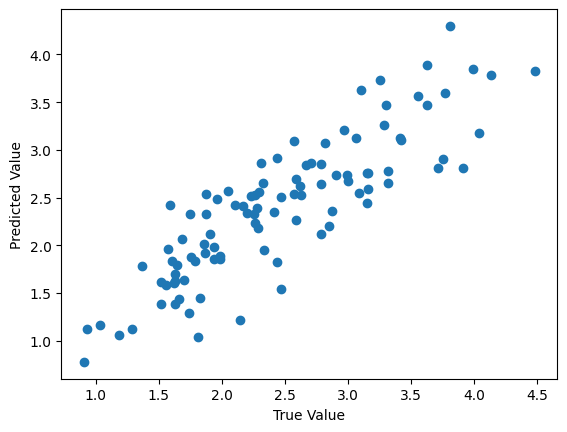

In [7]:

plt.figure();plt.scatter(y_test,y_pred);plt.xlabel('True Value');plt.ylabel('Predicted Value')
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error


# RMSE: Measures the average magnitude of the errors.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# R-squared: Proportion of variance in the dependent variable predictable from the independent variables.
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Mean Absolute Error: Average absolute difference between the observed actual outcomes and the predictions.
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

# Median Absolute Error: Median of all absolute differences between the predictions and actual values.
medae = median_absolute_error(y_test, y_pred)
print(f'Median Absolute Error: {medae}')

# Pearson Correlation Coefficient: Measures the linear correlation between actual and predicted values.
pearson_corr,p_pearson = pearsonr(y_test, y_pred)
print(f'Pearson Correlation Coefficient: {pearson_corr} p-value: {p_pearson}')

# Spearman's Rank Correlation Coefficient: Measures monotonicity of the relationship between actual and predicted values.
spearman_corr, p_spearman = spearmanr(y_test, y_pred)
print(f'Spearman Correlation Coefficient: {spearman_corr} p-value: {p_spearman}')

# MSE: The average of the squares of the errors or deviations.
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# MAPE: Measures the size of the error in percentage terms.
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape}%')

# RMSLE: Provides a measure of how accurate the predictions are, penalizing under-predictions more than over-predictions.
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f'RMSLE: {rmsle}')

# Adjusted R-squared: Adjusted for the number of predictors in the model; more useful for comparing models with different numbers of independent variables.
n = X_test.shape[0]  # Number of observations
p = X_test_const.shape[1] - 1  # Number of predictors
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print(f'Adjusted R-squared: {adjusted_r2}')

# AIC and BIC: Criteria for model selection among a finite set of models; lower values suggest better models.
# AIC is a tool for model selection that balances the model's fit to the data against its complexity, penalizing models with more parameters. It helps choose a model that explains the data well but with the fewest possible parameters.
# BIC also aims for a balance between fit and complexity but imposes a stricter penalty on models with more parameters, especially as the sample size grows.
aic = model.aic
bic = model.bic
print(f'AIC: {aic}')
print(f'BIC: {bic}')

# Ensure to include the relevant plotting and analysis code here as before...


# Model Summary

The output of model.summary() from an OLS (Ordinary Least Squares) regression in statsmodels provides a wealth of information about the regression model. Let's break down the key terms, particularly focusing on the coefficients, their standard error, and confidence intervals, and discuss how to interpret these.

## Coefficients (coef)
Interpretation: The coefficients represent the estimated impact of each independent variable on the dependent variable. For example, the coefficient for x1 (0.3021) means that for each one-unit increase in x1, the dependent variable y is expected to increase by approximately 0.3021 units, holding all other variables constant. The coefficient for const (1.9973) is the intercept, indicating the expected value of y when all independent variables are zero.
## Standard Error of the Coefficients (std err)
Interpretation: The standard error measures the variability or uncertainty in the estimate of the coefficient. A smaller standard error indicates a more precise estimate of the coefficient. For example, the standard error for x1 is 0.007, suggesting that the estimate of 0.3021 for x1 is relatively precise.
## T-Statistic (t)
Interpretation: The t-statistic is the ratio of the coefficient to its standard error. It is used to determine the statistical significance of the coefficient. A larger absolute value of the t-statistic indicates a higher level of significance.
## P-Value (P>|t|)
Interpretation: The p-value tests the null hypothesis that the coefficient is equal to zero (no effect). A p-value below a certain threshold (e.g., 0.05) indicates that we can reject the null hypothesis and conclude that there is a statistically significant relationship between the independent variable and the dependent variable. In this summary, both the intercept and x1 have p-values of 0.000, indicating strong evidence against the null hypothesis and suggesting that these coefficients are significantly different from zero.
## Confidence Interval ([0.025 0.975])
Interpretation: The 95% confidence interval of [0.288, 0.316] means that, across many repeated studies, about 95% of such intervals would contain the true effect of x on y. It's a measure of the method's reliability over many trials, not the probability that the true effect is in this range for a specific study. The interval's width reflects estimate precision, with narrower intervals being more precise..
## How to Use This Information
### Coefficients:
Provide insight into the direction and magnitude of the relationship between each predictor and the response variable.
### Standard Error:
Helps assess the reliability of the coefficients; smaller standard errors suggest more reliable estimates.
### P-Values:
Allow us to determine the statistical significance of each predictor. Predictors with low p-values are considered significantly associated with the response variable.
### Confidence Intervals:
Offer a range for the coefficient estimates, helping to understand the uncertainty and variability around these estimates.

In summary, this output helps in understanding not just the estimated effect of each predictor on the response variable but also the statistical significance and reliability of these estimates. It's a crucial step in model evaluation, guiding both interpretation and decision-making in the context of the regression analysis.






In [8]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2221.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          4.91e-245
Time:                        12:59:22   Log-Likelihood:                -608.30
No. Observations:                 900   AIC:                             1221.
Df Residuals:                     898   BIC:                             1230.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0113      0.019    108.456      0.0

# Advanced: Interpreting the Residual Error in Linear Regression
Residual errors, the differences between the observed and predicted values, are critical in assessing a linear regression model's adequacy. Analyzing residuals allows us to evaluate the assumptions underlying the linear regression model, ensuring that the model provides a valid and reliable representation of the data. Here’s how to interpret residual error and its importance:

## Lack of Correlation with Independent Variables
### Why It's Important:
Residuals should not be correlated with the independent variables. If residuals do show a pattern or correlation with the independent variables, this suggests that the model has not fully captured the relationship between the variables, possibly due to model misspecification, omission of relevant variables, or the presence of non-linear relationships. In linear regression, one of the key assumptions is that the residuals (the differences between the observed and predicted values) should be uncorrelated with the independent variables. This assumption is known as the assumption of homoscedasticity or homogeneity of variance.
### How to Check:
Plot residuals against each independent variable or the predicted values. If the plot shows no apparent pattern (i.e., the residuals are randomly scattered), this indicates no correlation. Patterns or trends suggest a problem with the model.
## Normality of Residuals
### Why It's Important:
The assumption of normality of residuals underpins the statistical tests for coefficients (e.g., t-tests) used in linear regression. Normality implies that the model's errors are random and that the model is correctly specified for the data. This assumption ensures the reliability of confidence intervals and hypothesis tests.
### How to Check:
Use a Q-Q plot (quantile-quantile plot) to visually assess normality. If the residuals follow a straight line, they are approximately normal. Statistical tests like the Shapiro-Wilk test can also be used for a more formal assessment.
## Interpretation When Residuals Are Not Normal
### Implications:
If residuals are not normally distributed, it may indicate issues like outliers, a skewed distribution of errors, or heteroscedasticity (non-constant variance of errors). This can affect the model's predictive accuracy and the validity of hypothesis tests.
### How to Address:
Consider transformations of the dependent variable (e.g., log transformation), adding missing variables that capture the non-linearity, or using robust regression methods or generalized linear models (GLMs) that do not assume normality of residuals.
## Theoretical Explanation
The normality of residuals is rooted in the Central Limit Theorem, which suggests that with a large enough sample size, the sampling distribution of the estimator (mean) will approximate a normal distribution, regardless of the population's distribution. Linear regression assumes that the error terms (residuals) are independent and identically distributed (i.i.d.) with a mean of zero and constant variance. These assumptions, along with normality, ensure that the Ordinary Least Squares (OLS) estimator is the Best Linear Unbiased Estimator (BLUE).

When residuals are not normally distributed, it indicates that the error terms might not be i.i.d., suggesting model misspecification or violations of OLS assumptions. This can lead to biased or inefficient estimates of the regression coefficients, affecting the model's predictive performance and the accuracy of inference (e.g., confidence intervals and p-values for hypothesis testing).

In practice, slight deviations from normality might not significantly impact large-sample regression analyses due to the Central Limit Theorem. However, in smaller samples or when deviations are substantial, it's crucial to address these issues to ensure the model's validity and reliability.

## Criticality of analyzing residual errors
Analyzing residual errors is paramount in regression analysis, ensuring that the model accurately captures the data's underlying structure without violating key assumptions. Addressing issues identified through residual analysis is crucial for improving model accuracy and ensuring the validity of statistical inferences derived from the model. However, the importance of this analysis can vary depending on the context of your study and the size of your dataset.

### When It Is Critical
#### Small Sample Sizes:
For datasets with a small number of observations, ensuring the normality of residuals is crucial. The reliability of the statistical tests for the regression coefficients, which assume normality, is more susceptible to deviations from this assumption in smaller samples.
#### Inference and Hypothesis Testing:
When the primary goal of your regression analysis is to make inferences about the population, such as testing hypotheses about the regression coefficients or constructing confidence intervals, checking for normality in residuals becomes essential. The validity of these inferential statistics depends heavily on the normality assumption.
##### Strict Assumptions Required:
 Certain types of regression analysis or specific disciplines may require strict adherence to assumptions, including normality of residuals, for theoretical or methodological reasons. In these cases, ensuring normality is critical for the acceptance and credibility of the results.
### When It Might Be Less Critical
#### Large Sample Sizes:
The Central Limit Theorem suggests that as sample sizes increase, the sampling distribution of the mean (and other statistics) tends to be normal, regardless of the distribution of the data. For large datasets, slight deviations from normality in residuals are less likely to affect the overall conclusions drawn from hypothesis tests and confidence intervals.
#### Predictive Modeling:
If the primary goal of the regression model is prediction rather than inference, the normality of residuals becomes less critical. What matters more in predictive modeling is how well the model performs on unseen data, which is often evaluated using metrics like RMSE (Root Mean Square Error) or MAE (Mean Absolute Error) that do not assume normality.
#### Alternative Models Available:
For data that clearly violate the normality assumption, alternative models such as robust regression or generalized linear models (GLMs) can be used. These models either do not assume normality of residuals or are designed to handle data with specific distributions, making the normality check less critical.

Shapiro-Wilk Test Statistic: 0.9785324335098267, P-Value: 0.10209343582391739
The residuals seem to be normally distributed.


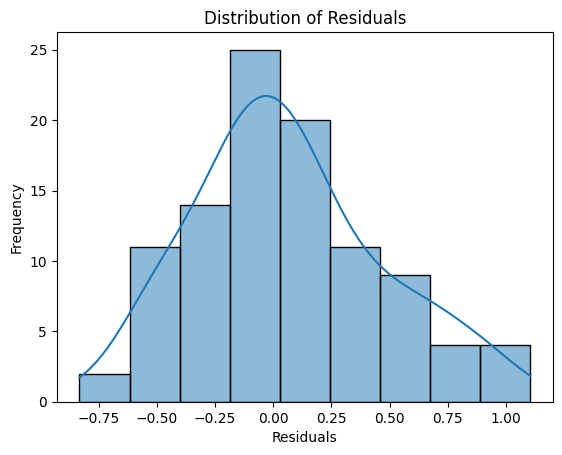

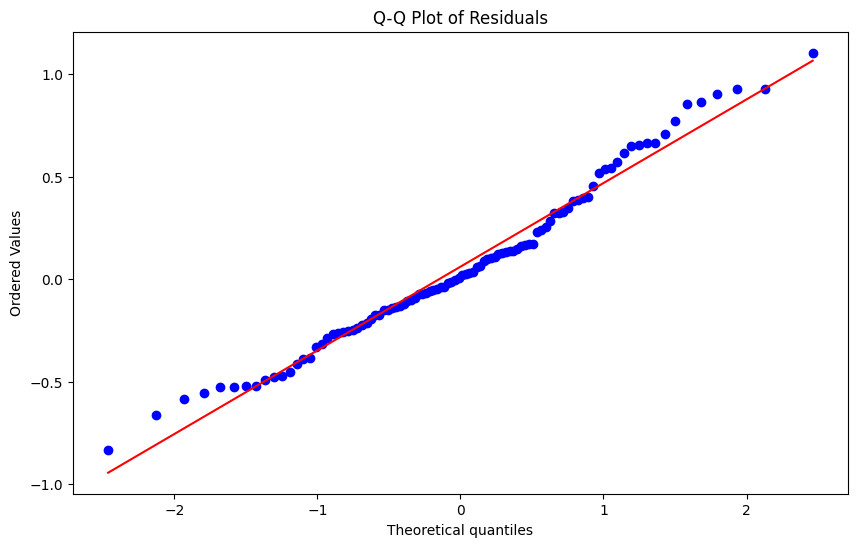

Correlation between residuals and independent variable: -8.445032628390698e-17
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2221.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          4.91e-245
Time:                        12:59:23   Log-Likelihood:                -608.30
No. Observations:                 900   AIC:                             1221.
Df Residuals:                     898   BIC:                             1230.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [9]:
residuals = y_test - y_pred

# Conducting Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test Statistic: {stat}, P-Value: {p_value}')

# Interpretation of the Shapiro-Wilk test
if p_value > 0.05:
    print("The residuals seem to be normally distributed.")
else:
    print("The residuals do not seem to be normally distributed.")

# Plotting residuals to check for normality
plt.figure();sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

# Q-Q plot for the residuals (to check if the rediduals are normal)
plt.figure(figsize=(10, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()
# Calculate residuals
residuals = model.resid

# Calculate correlation between residuals and independent variable
correlation = np.corrcoef(residuals, X_train)[0, 1]
print("Correlation between residuals and independent variable:", correlation)

# Optionally, print the summary of the regression model to get more insights
print(model.summary())


# Exercises

Here are some exercises to try out.

Non-linear Data with Linear Regression:
Generate non-linear data and apply a simple linear regression model to observe its effectiveness in capturing non-linear relationships. Then, extend the model to polynomial regression to better fit the non-linear data. First generate a dataset where the relationship between the independent variable and the dependent variable is non-linear (e.g., quadratic or exponential) and the apply linear regression. For a change, you can do this sklearn. You can optionally extend this to polynomial regression using "from sklearn.preprocessing import PolynomialFeatures".

Analyze the Impact of Outliers : Experiment: Add outliers to the dataset and observe how the regression coefficients and model performance change.

Hint: Introduce outliers by modifying a small percentage of the dependent variable y with significantly higher or lower values. Refit the model and compare the coefficients and performance metrics (e.g., R-squared) before and after adding outliers.

Regularization Techniques: Experiment: Explore the effects of regularization by implementing Lasso (L1 regularization) and Ridge (L2 regularization) regression models.

Hint: While statsmodels does offer some support for regularization, you may find it more straightforward to use scikit-learn's Lasso and Ridge classes for this experiment. Compare the coefficients and performance metrics to the original linear regression model.



# Trying other regressors

To apply different regression models such as OLS (Ordinary Least Squares), Ridge Regression, Lasso, Support Vector Regression (SVR), and Decision Tree Regression to the given dataset using scikit-learn, follow the code block below. This example demonstrates how to fit these models to the data, predict outcomes, and evaluate their performance using the R-squared metric.

## Models:
Each model represents a different approach to regression, from simple linear models (OLS, Ridge, Lasso) that incorporate regularization (Ridge, Lasso) to non-linear models (SVR, Decision Tree).
### Ridge and Lasso Regression:
These include regularization terms (alpha) to prevent overfitting by penalizing large coefficients.
### Support Vector Regression (SVR):
This model is based on the Support Vector Machine algorithm but adapted for regression, using parameters like C (regularization) and epsilon (margin of tolerance).
### Decision Tree Regression:
A non-linear model that uses tree-based structures to make predictions, where max_depth controls the depth of the tree.

This code block provides a practical comparison of different regression models on a simple dataset, showcasing the flexibility of scikit-learn for exploring various regression techniques.Y

## Exercise:
Try these for synthetic non-linear data.

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
# Initialize models

# Reshape X to fit the models
X = X.reshape(-1, 1)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# Fit models and print performance
# Initialize models
models = {
    'OLS': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'SVR': SVR(C=100.0, epsilon=0.1),
    'Decision Tree': DecisionTreeRegressor(max_depth=5)
}

# Fit models and make predictions
for name, model in models.items():
    model.fit(X_train, y_train)  # Fit model
    y_pred = model.predict(X_test)  # Predict on test set
    r2 = r2_score(y_test, y_pred)  # Calculate R-squared

    print(f'{name} Regression R-squared: {r2:.4f}')


OLS Regression R-squared: 0.7342
Ridge Regression R-squared: 0.7342
Lasso Regression R-squared: 0.7387
SVR Regression R-squared: 0.7217
Decision Tree Regression R-squared: 0.7050


## Colinearity in variables

Linear regression coefficients are interpretable even when there are multiple correlated variables (multicollinearity), but their interpretation becomes more nuanced and potentially misleading if multicollinearity is strong. Here’s how multicollinearity affects the interpretability of regression coefficients:

### Without Strong Multicollinearity
In the ideal case, when the predictor variables are not highly correlated with each other, the regression coefficient of each variable measures the change in the dependent variable for a one-unit change in that predictor, holding all other predictors constant. This allows for a straightforward interpretation of coefficients.

### With Strong Multicollinearity
#### Instability of Coefficients:
When predictor variables are highly correlated, small changes in the data can lead to large changes in the coefficients. This instability makes it difficult to trust that the coefficients accurately reflect the relationship between each predictor and the dependent variable.

#### Inflated Standard Errors:
Multicollinearity increases the standard errors of the coefficients. This can lead to wider confidence intervals and make it harder to determine if a variable is statistically significant.

#### Compromised Interpretation:
The interpretation of a coefficient as the effect of changing one variable while holding others constant becomes less meaningful. This is because in the presence of multicollinearity, changing one variable might inherently imply changes in others due to their correlation.

#### Strategies for Dealing with Multicollinearity

Variance Inflation Factor (VIF) : Calculate the VIF for each predictor. A common rule of thumb is that a VIF greater than 5 or 10 indicates problematic multicollinearity.
Read more: https://en.wikipedia.org/wiki/Variance_inflation_factor

Principal Component Regression (PCR): This method transforms the predictors into a set of uncorrelated components, which are then used in the regression. However, the interpretability of the original variables may be lost.

Ridge Regression: This is a type of regularization that adds a penalty to the size of coefficients. While it does not reduce multicollinearity, it can help stabilize coefficient estimates.

Remove or Combine Variables: If certain variables are highly correlated, consider removing one of the correlated variables or combining them into a single predictor through methods like averaging or summing.


The code below demonstrates this by generating some synthetic data.

In [11]:
import numpy as np
import statsmodels.api as sm

# Seed for reproducibility
np.random.seed(42)

# Simulating data
n = 100
X1 = np.random.normal(0, 1, n)
X2 = X1 + np.random.normal(0, 0.1, n)  # X2 is highly correlated with X1
y = 1 + 2*X1 + 3*X2 + np.random.normal(0, 1, n)

# Adding a constant to the predictor variable matrix
X = sm.add_constant(np.column_stack((X1, X2)))

# Fitting the linear regression model
model = sm.OLS(y, X).fit()

# Printing the summary
print(model.summary())

# Checking multicollinearity with Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print("VIF for each variable: [Constant, X1, X2] =", vif)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     952.5
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.73e-64
Time:                        12:59:23   Log-Likelihood:                -147.62
No. Observations:                 100   AIC:                             301.2
Df Residuals:                      97   BIC:                             309.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0886      0.108     10.058      0.0

The regression output indicates significant multicollinearity between the independent variables x1 and x2, as evidenced by the very high Variance Inflation Factor (VIF) values for both variables (approximately 90.78 for each). Here’s how to interpret the coefficients and output under such conditions:

Coefficients Interpretation
const (1.0886): The intercept term suggests that when both x1 and x2 are 0, the expected value of the dependent variable y is approximately 1.0886. This interpretation remains straightforward and is not directly affected by multicollinearity.

x1 (2.3489): The coefficient for x1 indicates that, holding x2 constant, a one-unit increase in x1 is associated with an average increase of 2.3489 units in the dependent variable y. However, due to the high multicollinearity, this interpretation must be taken with caution. The standard error for x1 is quite large (1.134), indicating a high level of uncertainty in this estimate.

x2 (2.8772): Similarly, the coefficient for x2 suggests that, holding x1 constant, a one-unit increase in x2 is associated with an average increase of 2.8772 units in y. Again, the interpretation is problematic due to multicollinearity, as reflected by the large standard error (1.144).

Effects of Multicollinearity
Inflated Standard Errors: The high VIF values confirm that x1 and x2 are highly correlated, leading to inflated standard errors for their coefficients. This reduces the precision of the estimates, making it harder to detect statistically significant relationships.

Unreliable Coefficient Estimates: The coefficients may not accurately represent the true relationship between the independent variables and the dependent variable due to the shared variance between x1 and x2.

Interpretation Challenges: While the model can still predict y effectively (as indicated by the high R-squared value of 0.952), interpreting the effect of x1 and x2 on y individually becomes challenging. Changes in x1 are hard to isolate from changes in x2 due to their correlation.


To illustrate these concepts, we will engage in a practical examination using a simulated dataset. Our focus will be on observing how collinearity between two predictors, X1 and X2, affects their coefficients in a regression model. We'll compare three different models:


*   A combined model that includes both X1 and X2 (above)
*   A model with X1 only
*   A model with X2 only

By fitting these models separately and analyzing their outputs, we aim to provide an intuitive understanding of how collinearity impacts coefficient estimates and the overall interpretation of regression results. This comparison will serve as a foundation for discussing strategies to diagnose and address collinearity, enhancing the reliability and clarity of regression analysis.

In [12]:
# Fitting separate models for X1 and X2
# Model for X1
X1_with_const = sm.add_constant(X1)
model_X1 = sm.OLS(y, X1_with_const).fit()
print("Summary for model with X1:")
print(model_X1.summary())

# Model for X2
X2_with_const = sm.add_constant(X2)
model_X2 = sm.OLS(y, X2_with_const).fit()
print("\nSummary for model with X2:")
print(model_X2.summary())


Summary for model with X1:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1801.
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           6.93e-65
Time:                        12:59:23   Log-Likelihood:                -150.78
No. Observations:                 100   AIC:                             305.6
Df Residuals:                      98   BIC:                             310.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0908    

Understanding the differences in the coefficients across these models can be insightful regarding the impact of collinearity in regression analysis. Here's an intuitive explanation:

Combined Model Coefficients: The coefficients for x1  and x2 are 2.3489 and 2.8772, respectively.

Interpretation: When both x1 and x2  are included in the model, their coefficients are estimated to account for the shared variance between them. The high Variance Inflation Factors (VIF) for x1 and x2 (both around 90.78) indicate severe collinearity, which inflates the standard errors of the coefficients, making them less precise and potentially biasing their estimates away from their true effect sizes.

X1 Model Coefficient: for x1 5.1849

Interpretation: This coefficient is substantially higher than in the combined model. When x1  is the only predictor, it absorbs not only its own effect on y but also the part of x2 's effect that is correlated with x1. This model does not suffer from the same level of collinearity as the combined model, hence the coefficient is more stable and has a smaller standard error, reflecting a more precise estimate.

X2 Model Coefficient for x2: 5.2340

Interpretation: Similar to the x1 model, x2's coefficient here is also much larger than in the combined model and slightly larger than x1 's coefficient in its separate model. This indicates that x2  is also capturing the shared variance with x1  when it is the sole predictor. The effect size is slightly larger, suggesting x2  may have a slightly stronger correlation with y due to its derivation from x1  plus some added noise.

Intuitive Understanding:

Isolation vs. Combination: When predictors x1  and x2  are analyzed in isolation, each one's coefficient reflects the total impact (direct and indirect through its correlation with the other predictor) on y. In the combined model, the coefficients reflect their partial impacts, controlling for the presence of the other.

Effect of Collinearity: Collinearity between x1 and x2  dilutes their individual coefficients in the combined model because it's harder to distinguish their separate effects on y. This results in less precise estimates (higher standard errors) and potentially misleading interpretations if the collinearity is not accounted for.

Precision and Reliability: The separate models give a clearer, though somewhat inflated, picture of each predictor's importance. The combined model attempts to partition the effects, but the high collinearity makes these estimates less reliable.


Narrowing down the effect of an individual variable in the presence of multicollinearity is challenging but possible using various statistical techniques and strategies. Multicollinearity can obscure the individual contribution of predictors in a regression model because it indicates that one predictor variable can be linearly predicted from others with a substantial degree of accuracy. However, several approaches can help isolate and understand the effect of an individual variable:

1. Ridge and Lasso Regression
Ridge Regression (L2 regularization) and Lasso Regression (L1 regularization) are regularization techniques that add a penalty to the size of coefficients. Lasso, in particular, can reduce some coefficients to zero, effectively selecting a simpler model that may mitigate multicollinearity and highlight the effect of individual variables.
2. Partial Least Squares Regression (PLS)
PLS seeks to find the directions of maximum covariance between the predictors and the response. It can be useful for understanding the effect of predictors on the response variable in the presence of multicollinearity by focusing on combinations of variables that are most relevant to the response.
3. Principal Component Analysis (PCA) and Principal Component Regression (PCR)
By transforming the predictors into a set of uncorrelated principal components and then using these components as predictors in a regression model, PCR can help identify the variance in the response accounted for by each principal component. However, the interpretation shifts from individual original variables to components.
4. Variance Inflation Factor (VIF) Analysis
Assessing the VIF of each variable can help identify the degree of multicollinearity. Variables with high VIF values are more affected by multicollinearity. Addressing these through removal, combining variables, or regularization can help clarify the role of remaining variables.
5. Excluding Correlated Predictors Temporarily
Temporarily excluding highly correlated predictors one at a time can help assess the impact of each variable individually. This method can provide insights into the unique contribution of each variable, but it should be used cautiously as it may oversimplify the model.
6. Dominance Analysis
Dominance analysis involves comparing the incremental contribution of each predictor to the model's fit across all possible subsets of the other predictors. It can provide a more comprehensive view of a variable's importance relative to others, even in the presence of multicollinearity.
7. Shapley Value Regression
Borrowed from cooperative game theory, Shapley values can be used to distribute the total effect in a model fairly among the predictors. This approach can quantify the contribution of each variable to the prediction, considering the interaction with all other variables.
8. Use of Theoretical Knowledge
Applying domain-specific theoretical knowledge can also guide the interpretation of the coefficients. Understanding expected relationships can help assess whether the observed effects of variables are plausible.

## Advanced Statistical Inference with Regression over count data

We have discussed how we can use linear regression to infer the dependent between variables. Understanding regression models  within the context of count data (gene expression or others), requires grasping the nuances of statistical methods and their application in real-world scenarios. The provided code snippet is an insightful illustration of how different regression models can be applied to count data, specifically data that might follow a Negative Binomial distribution. Let's break down the purpose of these models and the interpretation of the coefficients in each model's summary.

Linear Regression is typically used for continuous outcome data and assumes a linear relationship between the dependent and independent variables. It might not be the best choice for count data, which can be non-negative integers, because it can predict negative values and doesn't handle overdispersion (variance larger than the mean) well.

Poisson Regression is specifically designed for count data and assumes the counts follow a Poisson distribution, where the mean equals the variance. It's suitable for data that represents the number of times an event occurs in a fixed interval of space or time.

Negative Binomial Regression is another model for count data, particularly useful when the data exhibits overdispersion. It extends the Poisson regression by adding an extra parameter to model the variance independently of the mean, offering more flexibility.

Data Generation: The code simulates Negative Binomial-distributed count data, where x is the independent variable, and y_nb is the dependent count variable generated based on x, with a varying probability of success influenced by x through a logistic function.

Preliminary Linear Model: Before fitting the count models, a linear regression (OLS - Ordinary Least Squares) is applied as a preliminary step to inspect residuals. The plot of residuals vs. predicted values helps identify if the linear model assumptions are violated, such as non-linearity or heteroscedasticity (non-constant variance).

Model Fitting: The code fits three models to the count data: linear regression, Poisson regression, and Negative Binomial regression. This allows comparing the fit of each model to the data, which is visualized in a plot showing the actual counts and the predictions from each model.

Model Summaries: The summaries of each model provide detailed statistical information about the fit. The coefficients (coefs) in these summaries are crucial for interpretation:

Linear Regression Summary: Coefficients represent the change in the dependent variable for a one-unit change in the independent variable, assuming a linear relationship.

Poisson Regression Summary: Coefficients are interpreted in terms of log count. Exponentiating a coefficient gives the factor by which the expected count changes with a one-unit increase in the corresponding independent variable.

Negative Binomial Regression Summary: Similar to Poisson, but coefficients account for overdispersion. The interpretation of coefficients remains in terms of the log count, adjusted for the model's extra dispersion parameter.

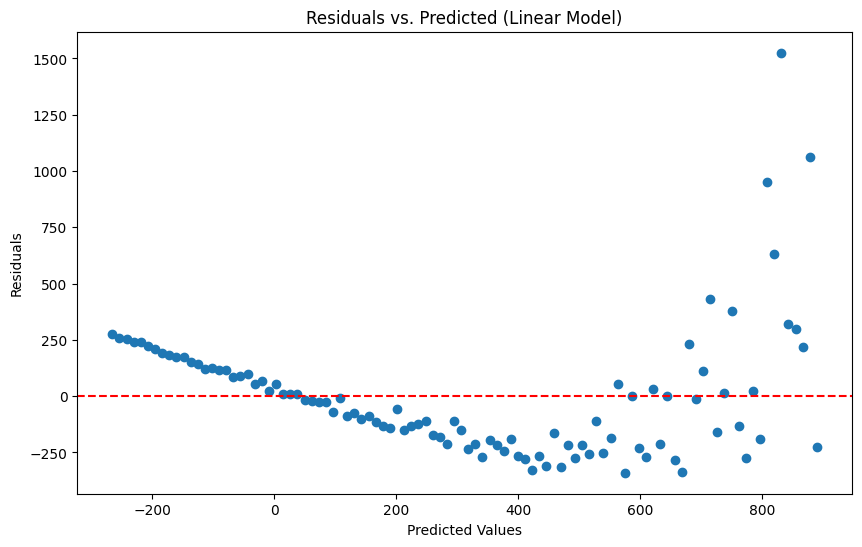

Optimization terminated successfully.
         Current function value: 5.219524
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16


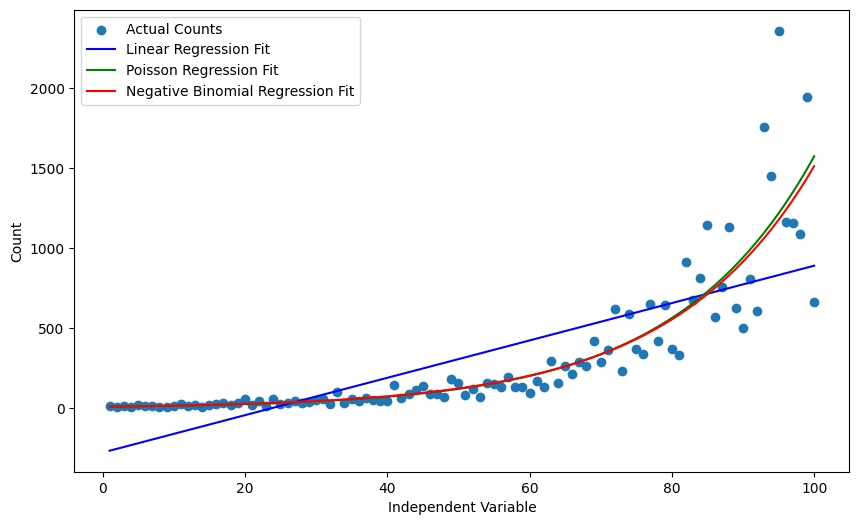

Linear Regression Summary:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     133.5
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           5.36e-20
Time:                        12:59:23   Log-Likelihood:                -708.38
No. Observations:                 100   AIC:                             1421.
Df Residuals:                      98   BIC:                             1426.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -276.6630   

In [13]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.discrete.discrete_model import NegativeBinomial

# Independent variable
x = np.arange(1, 101)

# Generating Negative Binomial-distributed count data
r = 10  # Number of successes
p = 1 / (1 + np.exp(0.05 * x))  # Probability of success varies with x
y_nb = np.random.negative_binomial(r, p)

# Adding constant for intercept
X_const = sm.add_constant(x)

# Preliminary Linear Model Fit to Inspect Residuals
linear_model_prelim = sm.OLS(y_nb, X_const).fit()
residuals_prelim = y_nb - linear_model_prelim.predict(X_const)

# Plot residuals to check for heteroscedasticity or non-linearity
plt.figure(figsize=(10, 6))
plt.scatter(linear_model_prelim.predict(X_const), residuals_prelim)
plt.title('Residuals vs. Predicted (Linear Model)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Fit Models on Negative Binomial Data
linear_model = sm.OLS(y_nb, X_const).fit()
poisson_model = sm.GLM(y_nb, X_const, family=sm.families.Poisson()).fit()
nb_model = NegativeBinomial(y_nb, X_const).fit()

# Predictions
y_pred_linear = linear_model.predict(X_const)
y_pred_poisson = poisson_model.predict(X_const)
y_pred_nb = nb_model.predict(X_const, which='mean')

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y_nb, label='Actual Counts')
plt.plot(x, y_pred_linear, color='blue', label='Linear Regression Fit')
plt.plot(x, y_pred_poisson, color='green', label='Poisson Regression Fit')
plt.plot(x, y_pred_nb, color='red', label='Negative Binomial Regression Fit')
plt.xlabel('Independent Variable')
plt.ylabel('Count')
plt.legend()
plt.show()

# Print model summaries
print("Linear Regression Summary:\n", linear_model.summary())
print("\nPoisson Regression Summary:\n", poisson_model.summary())
print("\nNegative Binomial Regression Summary:\n", nb_model.summary())


Comparing regression models objectively involves looking at several statistical measures that indicate the fit and predictive performance of each model. Since you have linear regression, Poisson regression, and Negative Binomial regression summaries, let's discuss how to compare these models based on their summaries.

1. Goodness-of-Fit Metrics
R-squared (Linear Regression): Indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s). For the linear model, an R-squared of 0.687 means about 68.7% of the variance in the dependent variable is explained by the model. However, R-squared is not available for Poisson and Negative Binomial regressions in the same sense because they use maximum likelihood estimation rather than least squares.
2. Log-Likelihood: Higher values indicate a better fit. It measures how well the model explains the observed data. Among the models, the Negative Binomial regression has a log-likelihood of -502.37, which is higher (less negative) than that of the Poisson regression (-1736.2), suggesting the Negative Binomial model fits the data better than the Poisson model.
3. Pseudo R-squared (for Poisson and Negative Binomial Regression): Provides an indication of the model fit, similar to R-squared in linear regression but calculated differently. The Negative Binomial model's Pseudo R-squared is 0.2345, indicating the proportion of the variance explained by the model. While there's no direct comparison with the R-squared from linear regression, it gives some sense of how well the model fits the data.
4. Model Comparison Metrics
AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion): These are not directly shown in your summaries but can usually be derived from the information given. Both criteria are used to compare models, with lower values indicating a better fit considering the complexity of the model. They penalize for the number of parameters to avoid overfitting. You can calculate AIC and BIC for each model and compare them directly.
5. Deviance (for Poisson and Negative Binomial Regression): Measures the discrepancy between the fitted model and the saturated model (a theoretical model with a perfect fit). Lower deviance indicates a better fit. In your summaries, the Poisson regression shows a deviance of 2814.8, but there's no direct deviance comparison for the Negative Binomial model in the summary provided. However, the concept of LLR (Likelihood Ratio Test) p-value in the Negative Binomial summary suggests a significant improvement over the null model.
6. Statistical Significance of Coefficients
The t-values (for the linear model) and z-values (for Poisson and Negative Binomial models) along with their corresponding p-values indicate the statistical significance of each coefficient. In all models, the coefficients for x1 are highly significant (p < 0.05), indicating a strong relationship between the independent variable and the dependent variable.
7. Overdispersion Check
The Negative Binomial model includes an alpha parameter, which accounts for overdispersion. The presence of this parameter and its significance (p < 0.05) suggest that the Negative Binomial model is more appropriate for the data with overdispersion than the Poisson model, which assumes equal mean and variance.


Given the summaries, the Negative Binomial regression appears to provide a better fit for the count data exhibiting overdispersion than both the linear and Poisson regressions.

# Advanced: Inference For non-negative continuous data

Gamma and Tweedie regressions are valuable tools for modeling non-negative continuous data, which is frequently encountered in various fields, including computational pathology. These models are especially useful for data that exhibit skewed distributions, such as time-to-event data, financial expenditures, or sizes of biological structures, which are common in medical and biological studies. Let's discuss how we might motivate the use of these regression models through a hypothetical code example and real-world applications, particularly in the context of image analysis in computational pathology.

## Gamma Regression
Gamma regression is well-suited for modeling non-negative continuous data that follow a Gamma distribution, characterized by its skewness. It is often used for data that represent times, rates, or other quantities that are strictly positive and have a skewed distribution.

## Tweedie Regression
Tweedie regression is a flexible model that can handle a combination of Gaussian, Poisson, and Gamma distributions. It is particularly useful for data that have a mass at zero and continuous outcomes, making it a versatile choice for diverse datasets.

The code begins by simulating non-negative continuous data that could represent tumor growth rates or the area of tissue damaged by disease.
It then fits both Gamma and Tweedie regression models to this data, providing a method to understand how different factors (represented by the independent variable x) might influence these outcomes.
The plots and summaries of these models help in assessing the fit and understanding the relationship between variables.

The interpretation of coefficients in model summaries varies depending on the type of regression model being used. Let's break down the interpretation for each of the regression models discussed: Linear Regression, Poisson Regression, Gamma Regression, and Tweedie Regression.

Linear Regression:
In a linear regression model, the coefficients represent the change in the dependent variable (outcome) for a one-unit change in the corresponding independent variable, assuming all other variables remain constant. Here's the exact interpretation:

Intercept (Constant): This is the value of the dependent variable when all independent variables are zero.
Coefficients for Independent Variables: These coefficients represent the change in the dependent variable for a one-unit change in the corresponding independent variable, holding all other independent variables constant.
Poisson Regression:
In Poisson regression, the coefficients are interpreted in terms of log count. Exponentiating a coefficient gives the factor by which the expected count changes with a one-unit increase in the corresponding independent variable. Here's the exact interpretation:

Intercept (Constant): This represents the expected log count when all independent variables are zero.
Coefficients for Independent Variables: Exponentiating these coefficients gives the multiplicative effect on the expected count for a one-unit increase in the corresponding independent variable, holding all other variables constant. For example, if the coefficient for a variable is 0.05, then for each one-unit increase in that variable, the expected count is multiplied by exp(0.05).
Gamma Regression:
In Gamma regression, the interpretation of coefficients is similar to that of linear regression. The coefficients represent the change in the dependent variable for a one-unit change in the corresponding independent variable. Here's the exact interpretation:

Intercept (Constant): This is the value of the dependent variable when all independent variables are zero.
Coefficients for Independent Variables: These coefficients represent the change in the dependent variable for a one-unit change in the corresponding independent variable, holding all other independent variables constant.
Tweedie Regression:
Tweedie regression is more complex because it can handle a combination of different distributions. The interpretation of coefficients in Tweedie regression depends on the specific power parameter chosen for the distribution. Generally, the coefficients represent the change in the expected value of the dependent variable for a one-unit change in the corresponding independent variable. Here's the general interpretation:

Intercept (Constant): This represents the expected value of the dependent variable when all independent variables are zero.
Coefficients for Independent Variables: These coefficients represent the change in the expected value of the dependent variable for a one-unit change in the corresponding independent variable, holding all other independent variables constant.
In all cases, interpreting coefficients requires considering the context of the data and the specific model assumptions. It's essential to interpret coefficients in conjunction with other diagnostic measures and to exercise caution, especially when making causal inferences.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


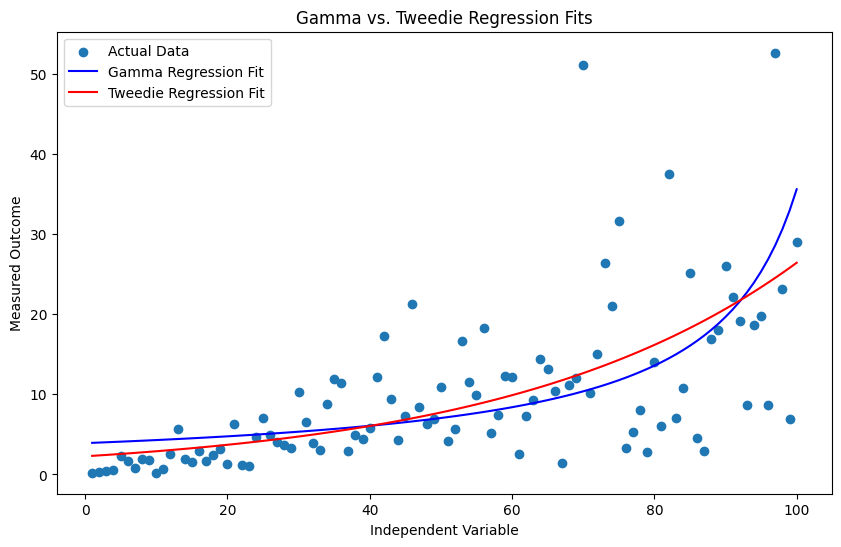

Gamma Regression Summary:
                  Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                   Gamma   Df Model:                            1
Link Function:           InversePower   Scale:                         0.61889
Method:                          IRLS   Log-Likelihood:                -302.86
Date:                Mon, 12 Feb 2024   Deviance:                       64.073
Time:                        12:59:24   Pearson chi2:                     60.7
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4529
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2560    

In [14]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gamma, Tweedie

# Simulate data for a hypothetical study
np.random.seed(42)
x = np.arange(1, 101)  # Independent variable: could represent days, dosage, etc.

# Gamma-distributed data for tumor growth rates or tissue damage area
y_gamma = np.random.gamma(shape=2, scale=(0.1 * x), size=len(x))

# Adding constant for intercept
X_const = sm.add_constant(x)

# Fit Gamma Regression Model
gamma_model = GLM(y_gamma, X_const, family=Gamma()).fit()

# Fit Tweedie Regression Model with a power parameter indicating the distribution near Gamma
tweedie_model = GLM(y_gamma, X_const, family=Tweedie(var_power=1.5)).fit()

# Predictions
y_pred_gamma = gamma_model.predict(X_const)
y_pred_tweedie = tweedie_model.predict(X_const)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y_gamma, label='Actual Data')
plt.plot(x, y_pred_gamma, color='blue', label='Gamma Regression Fit')
plt.plot(x, y_pred_tweedie, color='red', label='Tweedie Regression Fit')
plt.xlabel('Independent Variable')
plt.ylabel('Measured Outcome')
plt.legend()
plt.title('Gamma vs. Tweedie Regression Fits')
plt.show()

# Print model summaries
print("Gamma Regression Summary:\n", gamma_model.summary())
print("\nTweedie Regression Summary:\n", tweedie_model.summary())


## Advanced: Inferring causality (does X cause y or does y cause X)

We can use simple regression modeling to infer causal directions from observational data under certain assumptions. For more details, please see:

https://github.com/foxtrotmike/CS909/blob/master/inferring_causality.ipynb


# Advanced: Mixed Effect Models

See: https://github.com/foxtrotmike/stats/blob/main/mixed_effects_tutorial.ipynb
See: https://github.com/foxtrotmike/stats/blob/main/mixed_effects_model_tutorial.ipynb

